In [1]:
%run ../../macro_tQ.py

In [2]:
from qiskit import *
from qiskit.quantum_info import Statevector
U_simulator = Aer.get_backend('unitary_simulator')

qc_left= QuantumCircuit(2)
qc_right= QuantumCircuit(2)

qc_left.cx(0,1)
qc_left.cx(1,0)
qc_left.cx(0,1)
qc_right.swap(1,0)
 
print(qc_left)
print(qc_right)

U_left = execute(qc_left, backend = U_simulator).result().get_unitary()
U_right = execute(qc_right, backend = U_simulator).result().get_unitary()

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
        
q_0: ─X─
      │ 
q_1: ─X─
        


In [3]:
from qiskit.tools.visualization import array_to_latex
array_to_latex(U_left, prefix="\\text{U_left = }\n")

<IPython.core.display.Latex object>

In [4]:
array_to_latex(U_right, prefix="\\text{U_right = }\n")

<IPython.core.display.Latex object>

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


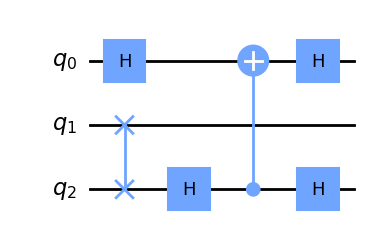

In [5]:
from qiskit import QuantumCircuit, transpile, Aer, QuantumRegister
qc = QuantumCircuit(3)


qc.h(0)
qc.swap(2,1)
qc.h(2)
qc.cx(2,0)
qc.h([0,2])
qc.draw('mpl')


In [6]:
print('tamaño=',qc.size())
print('puertas no locales=', qc.num_nonlocal_gates())
print('anchura=', qc.num_qubits)
print('profundidad=', qc.depth())


tamaño= 6
puertas no locales= 2
anchura= 3
profundidad= 4


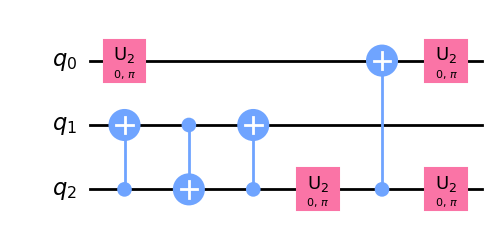

In [7]:
qc_dec=qc.decompose()
qc_dec.draw('mpl')

In [8]:
print('complejidad=', qc_dec.size())
print('puertas no locales=', qc_dec.num_nonlocal_gates())
print('anchura=', qc_dec.num_qubits)
print('profundidad=', qc_dec.depth())

complejidad= 8
puertas no locales= 4
anchura= 3
profundidad= 6


In [9]:
#from qiskit import IBMQ
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q')
#provider.backends()

In [10]:
#backend = provider.get_backend("ibmq_lima")
#backend.configuration().basis_gates

In [11]:
###qc_trans = transpile(qc_dec)
#qc_trans = transpile(qc,backend)
#qc_trans.draw('mpl')

In [12]:
#print('complejidad=', qc_trans.size())
#print('puertas no locales=', qc_trans.num_nonlocal_gates())
#print('anchura=', qc_trans.num_qubits)
#print('profundidad=', qc_trans.depth())